# Method Parameterisation Testing

Preliminary Code

In [7]:
# Import libraries
import numpy as np
import marvin
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [8]:
from marvin import config
config.access

'public'

In [9]:
config.setDR('DR17')
config.release

'DR17'

Code taken from GitHub Issues page to fix API error

In [10]:
from marvin import config
config.switchSasUrl(sasmode='mirror')

# Unnormalised Residual Velocity Method

As a proof of concept, implement unnormalised residual velocity technique for one galaxy

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


Min of abs_res:  0.0
Max of abs_res:  58.03580500000001
sum_res_val:  29688.2294755864


[WARNING]: Warning: converting a masked element to nan. (UserWarning)


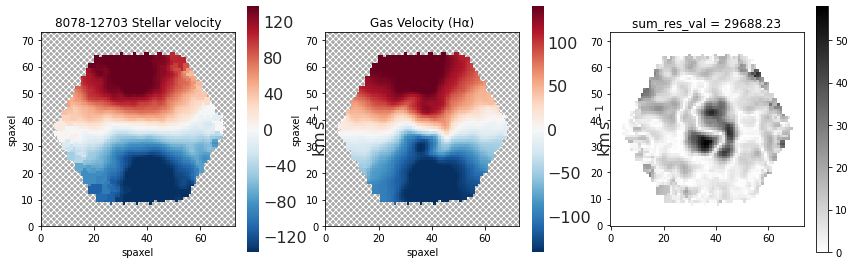

In [13]:
from marvin.tools import Maps

# Load in test map (bottom-left of Smethurst et al., 2018)
maps = Maps("8078-12703")

# Select stellar and gas velocity (H-alpha)
sv = maps.stellar_vel
gv = maps.emline_gvel_ha_6564

# Calculate absolute residual velocity value
abs_res = np.abs(sv.value - gv.value)
print("Min of abs_res: ", np.min(abs_res))
print("Max of abs_res: ", np.max(abs_res))

# Create residual map
res_map = sv - gv

# Transform map into set of values
res_vals = np.abs(sv.value - gv.value)

# Calculate summed absolute residual velocity value
sum_res_val = np.sum(res_vals)
print("sum_res_val: ", sum_res_val)

# Use Marvin x and y values to obtain shape of arrays to plot colormap of absolute residual
num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
x = np.arange(num_xy)
y = np.arange(num_xy)

# Create figure (& extra plotting code)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

# Plot stellar, gas velocities
sv.plot(fig=fig, ax=ax[0], title="8078-12703 Stellar velocity")
gv.plot(fig=fig, ax=ax[1], title="Gas Velocity (Hα)")

# Plot absolute residual colormap
rv_pcolormesh = ax[2].pcolormesh(x, y, res_vals, cmap=cm.binary, shading="auto")
fig.colorbar(rv_pcolormesh, ax=ax[2])

ax[2].set_title("sum_res_val = " + "{:.2f}".format(sum_res_val))
ax[2].set_aspect("equal")

Now implement for all galaxies in sample. Start by looping over each classification, then combine each array to investigate properties of all 10 together

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  0
MaNGA ID:  8600-12703
Min of res_vals:  0.0
Max of res_vals:  2161.522825
sum_res_val:  469331.73474568396


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  1
MaNGA ID:  8466-6103
Min of res_vals:  0.0
Max of res_vals:  1714.641518
sum_res_val:  189491.11500065998


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  2
MaNGA ID:  8726-1901
Min of res_vals:  0.0
Max of res_vals:  1065.7605079999998
sum_res_val:  34451.864503396006


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  3
MaNGA ID:  8721-12701
Min of res_vals:  0.0
Max of res_vals:  2171.6790800000003
sum_res_val:  715319.038034361


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  4
MaNGA ID:  8481-6101
Min of res_vals:  0.0
Max of res_vals:  435.77882
sum_res_val:  61264.87093388599


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  5
MaNGA ID:  8725-1902
Min of res_vals:  0.0
Max of res_vals:  438.37255569999996
sum_res_val:  39689.6838930031


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  6
MaNGA ID:  8078-12703
Min of res_vals:  0.0
Max of res_vals:  58.03580500000001
sum_res_val:  29688.2294755864


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  7
MaNGA ID:  8615-6104
Min of res_vals:  0.0
Max of res_vals:  11069.31798
sum_res_val:  65903.44629189


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  8
MaNGA ID:  8597-1902
Min of res_vals:  0.0
Max of res_vals:  769.233052
sum_res_val:  47149.763534159996


[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)


i =  9
MaNGA ID:  8485-1901
Min of res_vals:  0.0
Max of res_vals:  261.634157
sum_res_val:  19263.66031111


[WARNING]: Warning: converting a masked element to nan. (UserWarning)


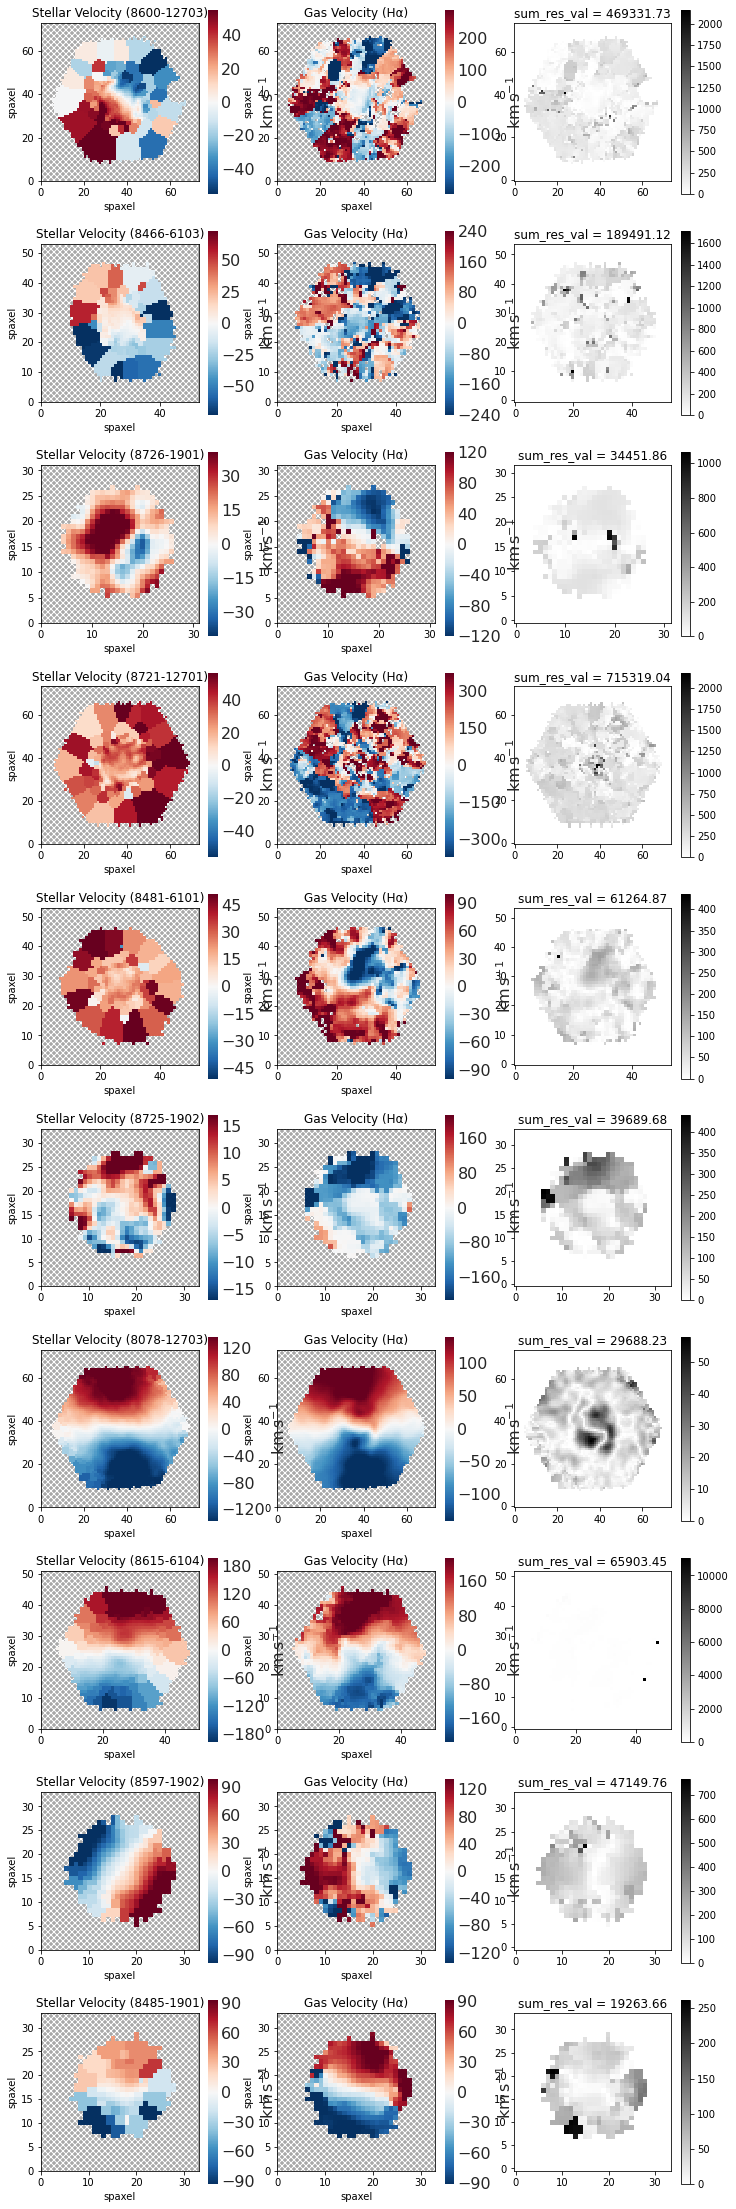

In [17]:
from marvin.tools import Maps

# MaNGA codes for each class of rotator
non_reg_ids = ['8600-12703', '8466-6103', '8726-1901']
slow_rot_ids = ['8721-12701', '8481-6101', '8725-1902']
fast_rot_ids = ['8078-12703', '8615-6104', '8597-1902', '8485-1901']

# Combined set of ids (in case studying as one dataset is more helpful/efficient)
combined_ids = non_reg_ids + slow_rot_ids + fast_rot_ids

# Initialise arrays to store data for analysis

# Plot initial figure and axes
fig, ax = plt.subplots(nrows=len(combined_ids), ncols=3, figsize=(12, 4*len(combined_ids)))

# Non-regular rotators
for i in range(len(non_reg_ids)):
    # Access map of ith galaxy
    maps = Maps(non_reg_ids[i])

    # Select stellar and gas velocity (H-alpha)
    sv = maps.stellar_vel
    gv = maps.emline_gvel_ha_6564

    # Create residual image
    res = sv - gv
    
    print("i = ", i)
    
    # Print MaNGA ID for checking
    print("MaNGA ID: ", non_reg_ids[i])
    
    # Transform map into set of values
    res_vals = np.abs(sv.value - gv.value)
    print("Min of res_vals: ", np.min(res_vals))
    print("Max of res_vals: ", np.max(res_vals))
    
    # Calculate summed absolute residual velocity value
    sum_res_val = np.sum(res_vals)
    print("sum_res_val: ", sum_res_val)
    
    # Use Marvin x and y values to obtain shape of arrays to plot colormap of absolute residual
    num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
    x = np.arange(num_xy)
    y = np.arange(num_xy)

    # Plot stellar and gas velocities
    sv.plot(fig=fig, ax=ax[i, 0], title="Stellar Velocity (" + str(non_reg_ids[i]) + ")")
    gv.plot(fig=fig, ax=ax[i, 1], title="Gas Velocity (Hα)")
    
    # Plot absolute residual colormap
    rv_pcolormesh = ax[i, 2].pcolormesh(x, y, res_vals, cmap=cm.binary, shading="auto")
    fig.colorbar(rv_pcolormesh, ax=ax[i, 2])

    ax[i, 2].set_title("sum_res_val = " + "{:.2f}".format(sum_res_val))
    ax[i, 2].set_aspect("equal")
    
# Slow rotators
for i in range(len(slow_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(slow_rot_ids[i])

    # Select stellar and gas velocity (H-alpha)
    sv = maps.stellar_vel
    gv = maps.emline_gvel_ha_6564

    # Create residual image
    res = sv - gv
    
    print("i = ", i + len(non_reg_ids))
    
    # Print MaNGA ID for checking
    print("MaNGA ID: ", slow_rot_ids[i])
    
    # Transform map into set of values
    res_vals = np.abs(sv.value - gv.value)
    print("Min of res_vals: ", np.min(res_vals))
    print("Max of res_vals: ", np.max(res_vals))

    # Calculate summed absolute residual velocity value
    sum_res_val = np.sum(res_vals)
    print("sum_res_val: ", sum_res_val)
    
    # Use Marvin x and y values to obtain shape of arrays to plot colormap of absolute residual
    num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
    x = np.arange(num_xy)
    y = np.arange(num_xy)

    # Plot stellar and gas velocities
    sv.plot(fig=fig, ax=ax[i+len(non_reg_ids), 0], title="Stellar Velocity (" + str(slow_rot_ids[i]) + ")")
    gv.plot(fig=fig, ax=ax[i+len(non_reg_ids), 1], title="Gas Velocity (Hα)")
    
    # Plot absolute residual colormap
    rv_pcolormesh = ax[i+len(non_reg_ids), 2].pcolormesh(x, y, res_vals, cmap=cm.binary, shading="auto")
    fig.colorbar(rv_pcolormesh, ax=ax[i+len(non_reg_ids), 2])

    ax[i+len(non_reg_ids), 2].set_title("sum_res_val = " + "{:.2f}".format(sum_res_val))
    ax[i+len(non_reg_ids), 2].set_aspect("equal")
    
# Fast rotators
for i in range(len(fast_rot_ids)):
    # Access map of ith galaxy
    maps = Maps(fast_rot_ids[i])
    
    # Select stellar and gas velocity (H-alpha)
    sv = maps.stellar_vel
    gv = maps.emline_gvel_ha_6564

    # Create residual image
    res = sv - gv
    
    print("i = ", i + len(non_reg_ids) + len(slow_rot_ids))
    
    # Print MaNGA ID for checking
    print("MaNGA ID: ", fast_rot_ids[i])
    
    # Transform map into set of values
    res_vals = np.abs(sv.value - gv.value)
    print("Min of res_vals: ", np.min(res_vals))
    print("Max of res_vals: ", np.max(res_vals))

    # Calculate summed absolute residual velocity value
    sum_res_val = np.sum(res_vals)
    print("sum_res_val: ", sum_res_val)
    
    # Use Marvin x and y values to obtain shape of arrays to plot colormap of absolute residual
    num_xy = np.size(maps.spx_skycoo_on_sky_x[0])
    x = np.arange(num_xy)
    y = np.arange(num_xy)

    # Plot stellar and gas velocities
    sv.plot(fig=fig, ax=ax[i+len(non_reg_ids)+len(slow_rot_ids), 0], title="Stellar Velocity (" + str(fast_rot_ids[i]) + ")")
    gv.plot(fig=fig, ax=ax[i+len(non_reg_ids)+len(slow_rot_ids), 1], title="Gas Velocity (Hα)")
    
    # Plot absolute residual colormap
    rv_pcolormesh = ax[i+len(non_reg_ids)+len(slow_rot_ids), 2].pcolormesh(x, y, res_vals, cmap=cm.binary, shading="auto")
    fig.colorbar(rv_pcolormesh, ax=ax[i+len(non_reg_ids)+len(slow_rot_ids), 2])

    ax[i+len(non_reg_ids)+len(slow_rot_ids), 2].set_title("sum_res_val = " + "{:.2f}".format(sum_res_val))
    ax[i+len(non_reg_ids)+len(slow_rot_ids), 2].set_aspect("equal")